# **Exploración de los datos**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def clean_data_country(root):
    "Nos devuelve el fichero de cada país limpio"
    
    df_country = pd.read_excel(root, header=1)
    df_country = df_country.drop([0], axis=0)
    df_country.rename(columns={'Unnamed: 1':'industry',
                        'Elemento': 'country'}, inplace=True)
    country_name = df_country['country'][1]
    df_country['country'] = df_country['country'].replace(np.nan, country_name)
   
  
    return df_country

In [3]:
spanish_investment = pd.DataFrame()
directory_spain = 'Inversion España en LATAM/'

directory_spanish = pathlib.Path(directory_spain)

for file in directory_spanish.iterdir():
    country = clean_data_country(file)
    spanish_investment = pd.concat([spanish_investment, country])

WARNING *** file size (32704) not 512 + multiple of sector size (512)
WARNING *** file size (32704) not 512 + multiple of sector size (512)
WARNING *** file size (32704) not 512 + multiple of sector size (512)
WARNING *** file size (32704) not 512 + multiple of sector size (512)


In [4]:
spanish_investment.head()

,country,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,CHILE,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",357,NaN,NaN,NaN,408.79,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2,CHILE,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN
3,CHILE,03 PESCA Y ACUICULTURA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CHILE,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CHILE,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
spanish_investment.tail()

,country,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
84,COLOMBIA,"95 REPARACIÓN ORDENADORES, EFECTOS PERSONALES",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,COLOMBIA,96 OTROS SERVICIOS PERSONALES,NaN,NaN,NaN,NaN,NaN,17.53,21.05,18.92,...,NaN,NaN,NaN,NaN,NaN,3,3,1.5,2.7,NaN
86,COLOMBIA,97 ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.05,NaN,NaN
87,COLOMBIA,98 ACTIV. HOGARES COMO PRODUC. BIENES Y SERV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,COLOMBIA,99 ACTIV. ORGANIZACIONES Y ORGANISMOS EXTRATER...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
spanish_investment['country'].unique()

array(['CHILE', 'PERU', 'MEXICO', 'COLOMBIA'], dtype=object)

In [18]:
spanish_investment['industry'].unique()

array(['01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACIONADOS',
       '02 SILVICULTURA Y EXPLOTACIÓN FORESTAL', '03 PESCA Y ACUICULTURA',
       '05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO',
       '06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL',
       '07 EXTRACCIÓN DE MINERALES METÁLICOS',
       '08 OTRAS INDUSTRIAS EXTRACTIVAS',
       '09 ACTIVIDADES DE APOYO A LAS INDUSTRIAS EXTRACTIVAS',
       '10 INDUSTRIA DE LA ALIMENTACIÓN', '11 FABRICACIÓN DE BEBIDAS',
       '12 INDUSTRIA DEL TABACO', '13 INDUSTRIA TEXTIL',
       '14 CONFECCIÓN DE PRENDAS DE VESTIR',
       '15 INDUSTRIA DEL CUERO Y DEL CALZADO',
       '16 INDUSTRIA MADERA Y CORCHO, EXCEPTO MUEBLES, CESTERÍA',
       '17 INDUSTRIA DEL PAPEL',
       '18 ARTES GRÁFICAS Y REPRODUCCIÓN DE SOPORTES GRABADOS',
       '19 COQUERÍAS Y REFINO DE PETRÓLEO', '20 INDUSTRIA QUÍMICA',
       '21 FABRICACIÓN DE PRODUCTOS FARMACÉUTICOS',
       '22 FABRICACIÓN DE PRODUCTOS DE CAUCHO Y PLÁSTICOS',
       '23 FABRICACIÓN DE OTROS PR

In [7]:
spanish_investment.dtypes

country     object
industry    object
1993        object
1994        object
1995        object
1996        object
1997        object
1998        object
1999        object
2000        object
2001        object
2002        object
2003        object
2004        object
2005        object
2006        object
2007        object
2008        object
2009        object
2010        object
2011        object
2012        object
2013        object
2014        object
2015        object
2016        object
2017        object
2018        object
2019        object
2020        object
dtype: object

In [8]:
print('Tamaño del DF:', spanish_investment.shape)
print('Número de valores nulos en cada columna:',spanish_investment.isnull().sum())

Tamaño del DF: (352, 30)
Número de valores nulos en cada columna: country       0
industry      0
1993        299
1994        306
1995        298
1996        295
1997        275
1998        276
1999        265
2000        255
2001        252
2002        250
2003        261
2004        271
2005        274
2006        284
2007        274
2008        275
2009        270
2010        276
2011        264
2012        275
2013        269
2014        258
2015        243
2016        227
2017        226
2018        221
2019        249
2020        271
dtype: int64


In [9]:
spanish_investment_2 = spanish_investment.melt(['industry','country'])
spanish_investment_2.head()

,industry,country,variable,value
0,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",CHILE,1993,357
1,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,CHILE,1993,NaN
2,03 PESCA Y ACUICULTURA,CHILE,1993,NaN
3,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",CHILE,1993,NaN
4,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,CHILE,1993,NaN


In [ ]:
#spanish_investment_2 = spanish_investment_2.dropna()

In [ ]:
#print('Tamaño del DF:', spanish_investment_2.shape)
#print('Número de valores nulos en cada columna:',spanish_investment_2.isnull().sum())

In [ ]:
#spanish_investment_2.head()

In [10]:
spanish_investment_2 = spanish_investment_2[['variable','value','country', 'industry']]
spanish_investment_2.head()

,variable,value,country,industry
0,1993,357,CHILE,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI..."
1,1993,NaN,CHILE,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL
2,1993,NaN,CHILE,03 PESCA Y ACUICULTURA
3,1993,NaN,CHILE,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO"
4,1993,NaN,CHILE,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL


In [11]:
spanish_investment_2.rename(columns={'variable':'year',
                        'value': 'investment'}, inplace=True)
spanish_investment_2.head()

,year,investment,country,industry
0,1993,357,CHILE,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI..."
1,1993,NaN,CHILE,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL
2,1993,NaN,CHILE,03 PESCA Y ACUICULTURA
3,1993,NaN,CHILE,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO"
4,1993,NaN,CHILE,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL


In [12]:
spanish_investment_2.tail()


,year,investment,country,industry
9851,2020,NaN,COLOMBIA,"95 REPARACIÓN ORDENADORES, EFECTOS PERSONALES"
9852,2020,NaN,COLOMBIA,96 OTROS SERVICIOS PERSONALES
9853,2020,NaN,COLOMBIA,97 ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES
9854,2020,NaN,COLOMBIA,98 ACTIV. HOGARES COMO PRODUC. BIENES Y SERV
9855,2020,NaN,COLOMBIA,99 ACTIV. ORGANIZACIONES Y ORGANISMOS EXTRATER...


## **Total de la inversión de cada año por país**

In [26]:
sp_investment_year_country = spanish_investment_2.groupby(('year', 'country')).investment.sum().reset_index()
sp_investment_year_country.head()

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


,year,country,investment
0,1993,CHILE,1242.12
1,1993,COLOMBIA,8742.56
2,1993,MEXICO,47135.97
3,1993,PERU,96.65
4,1994,CHILE,360.09


Text(0.5, 1.0, 'Inversión total por paises')

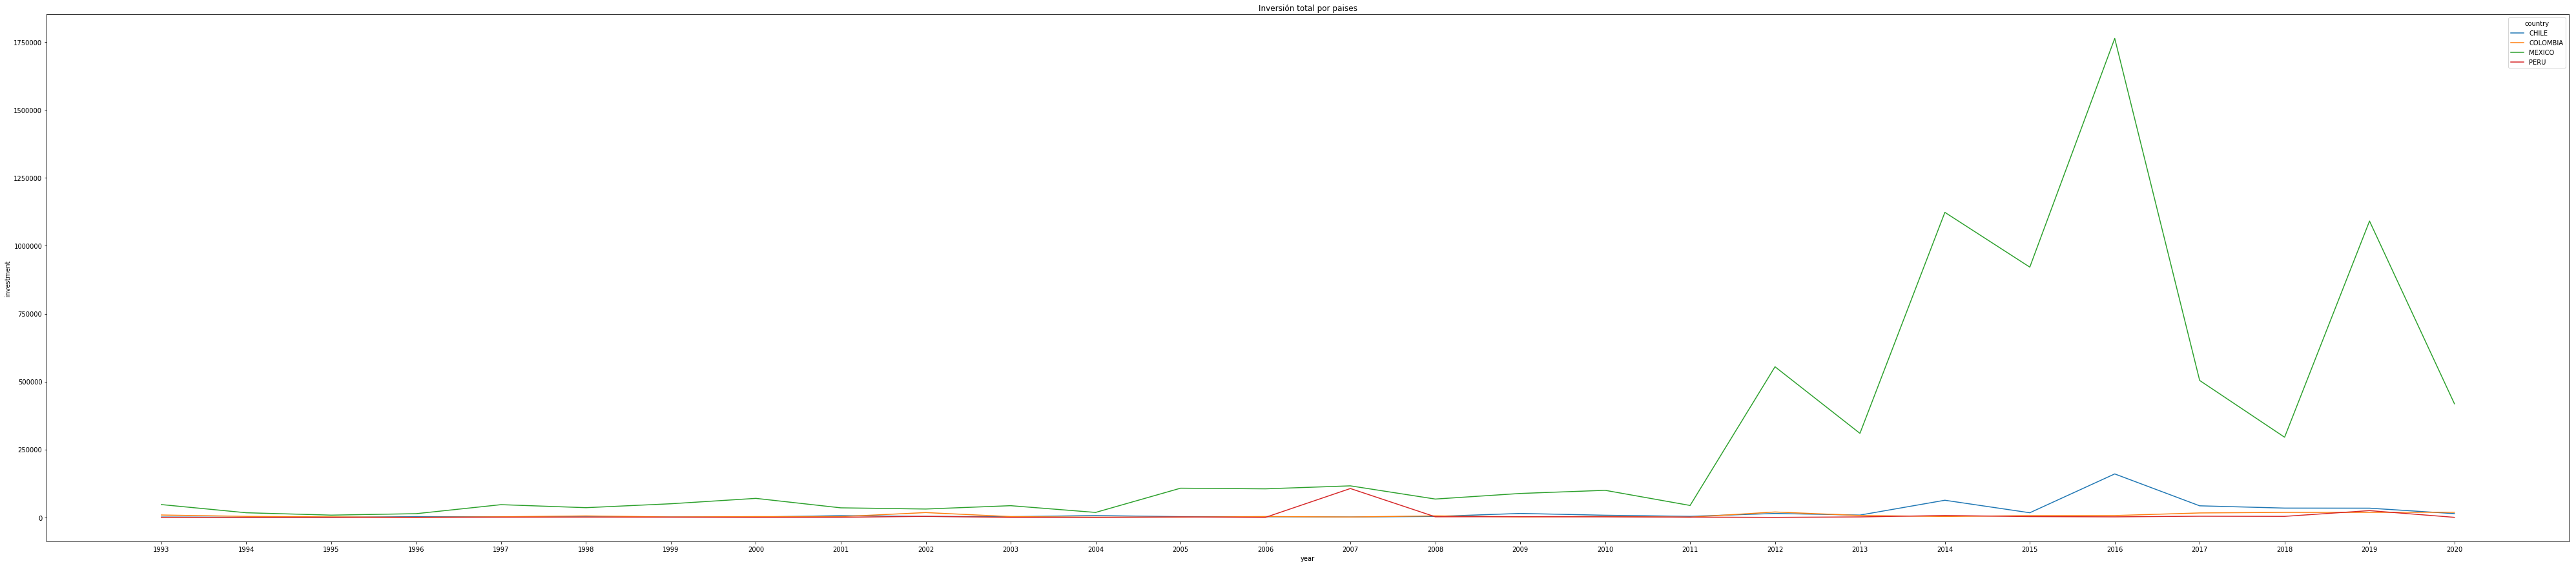

In [27]:
plt.figure(figsize=(70,15))
sns.lineplot(data=sp_investment_year_country, x='year', y='investment', hue='country')
plt.title('Inversión total por paises')

# Chile

In [16]:
df_cl_industry = spanish_investment_2[spanish_investment_2.country == 'CHILE']
df_cl_industry.head()

,year,investment,country,industry
0,1993,357,CHILE,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI..."
1,1993,NaN,CHILE,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL
2,1993,NaN,CHILE,03 PESCA Y ACUICULTURA
3,1993,NaN,CHILE,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO"
4,1993,NaN,CHILE,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL


In [17]:
df_cl_industry.max()

year                                                       2020
investment                                               137500
country                                                   CHILE
industry      99 ACTIV. ORGANIZACIONES Y ORGANISMOS EXTRATER...
dtype: object

In [20]:
df_cl_industry[df_cl_industry.industry=='99 ACTIV. ORGANIZACIONES Y ORGANISMOS EXTRATERRITORIAL']

,year,investment,country,industry
87,1993,NaN,CHILE,99 ACTIV. ORGANIZACIONES Y ORGANISMOS EXTRATER...
439,1994,NaN,CHILE,99 ACTIV. ORGANIZACIONES Y ORGANISMOS EXTRATER...
791,1995,NaN,CHILE,99 ACTIV. ORGANIZACIONES Y ORGANISMOS EXTRATER...
1143,1996,NaN,CHILE,99 ACTIV. ORGANIZACIONES Y ORGANISMOS EXTRATER...
1495,1997,NaN,CHILE,99 ACTIV. ORGANIZACIONES Y ORGANISMOS EXTRATER...
1847,1998,NaN,CHILE,99 ACTIV. ORGANIZACIONES Y ORGANISMOS EXTRATER...
2199,1999,NaN,CHILE,99 ACTIV. ORGANIZACIONES Y ORGANISMOS EXTRATER...
2551,2000,NaN,CHILE,99 ACTIV. ORGANIZACIONES Y ORGANISMOS EXTRATER...
2903,2001,NaN,CHILE,99 ACTIV. ORGANIZACIONES Y ORGANISMOS EXTRATER...
3255,2002,NaN,CHILE,99 ACTIV. ORGANIZACIONES Y ORGANISMOS EXTRATER...


Text(0.5, 1.0, 'Evolucion de la inversión en Chile')

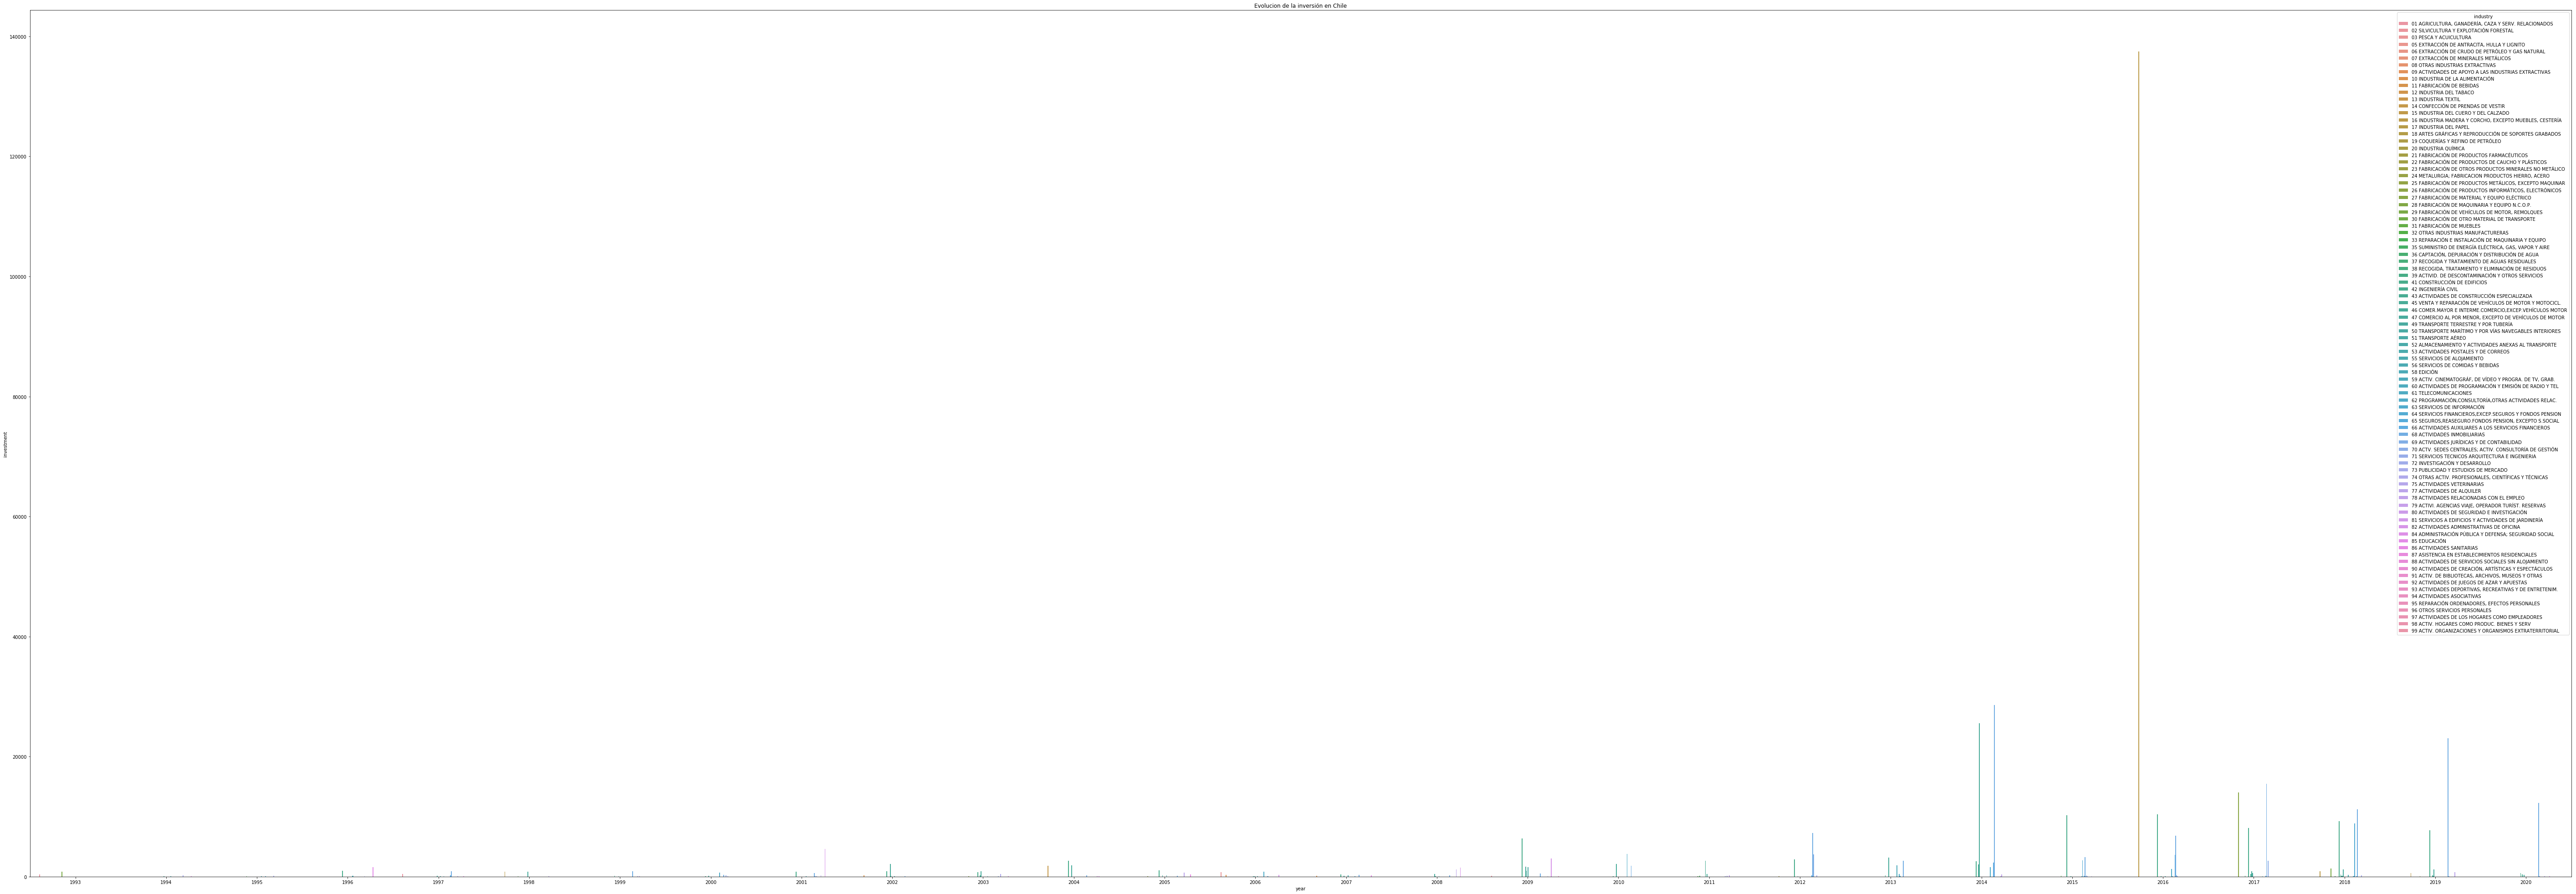

In [24]:
plt.figure(figsize=(100,35))
sns.barplot(data=df_cl_industry, x='year', y='investment', hue='industry')
plt.title('Evolucion de la inversión en Chile')

In [29]:
sp_investment_year_cl = sp_investment_year_country[sp_investment_year_country.country == 'CHILE']
sp_investment_year_cl.head()

,year,country,investment
0,1993,CHILE,1242.12
4,1994,CHILE,360.09
8,1995,CHILE,280.37
12,1996,CHILE,2810.80
16,1997,CHILE,1937.27


Text(0.5, 1.0, 'Inversión total Chile')

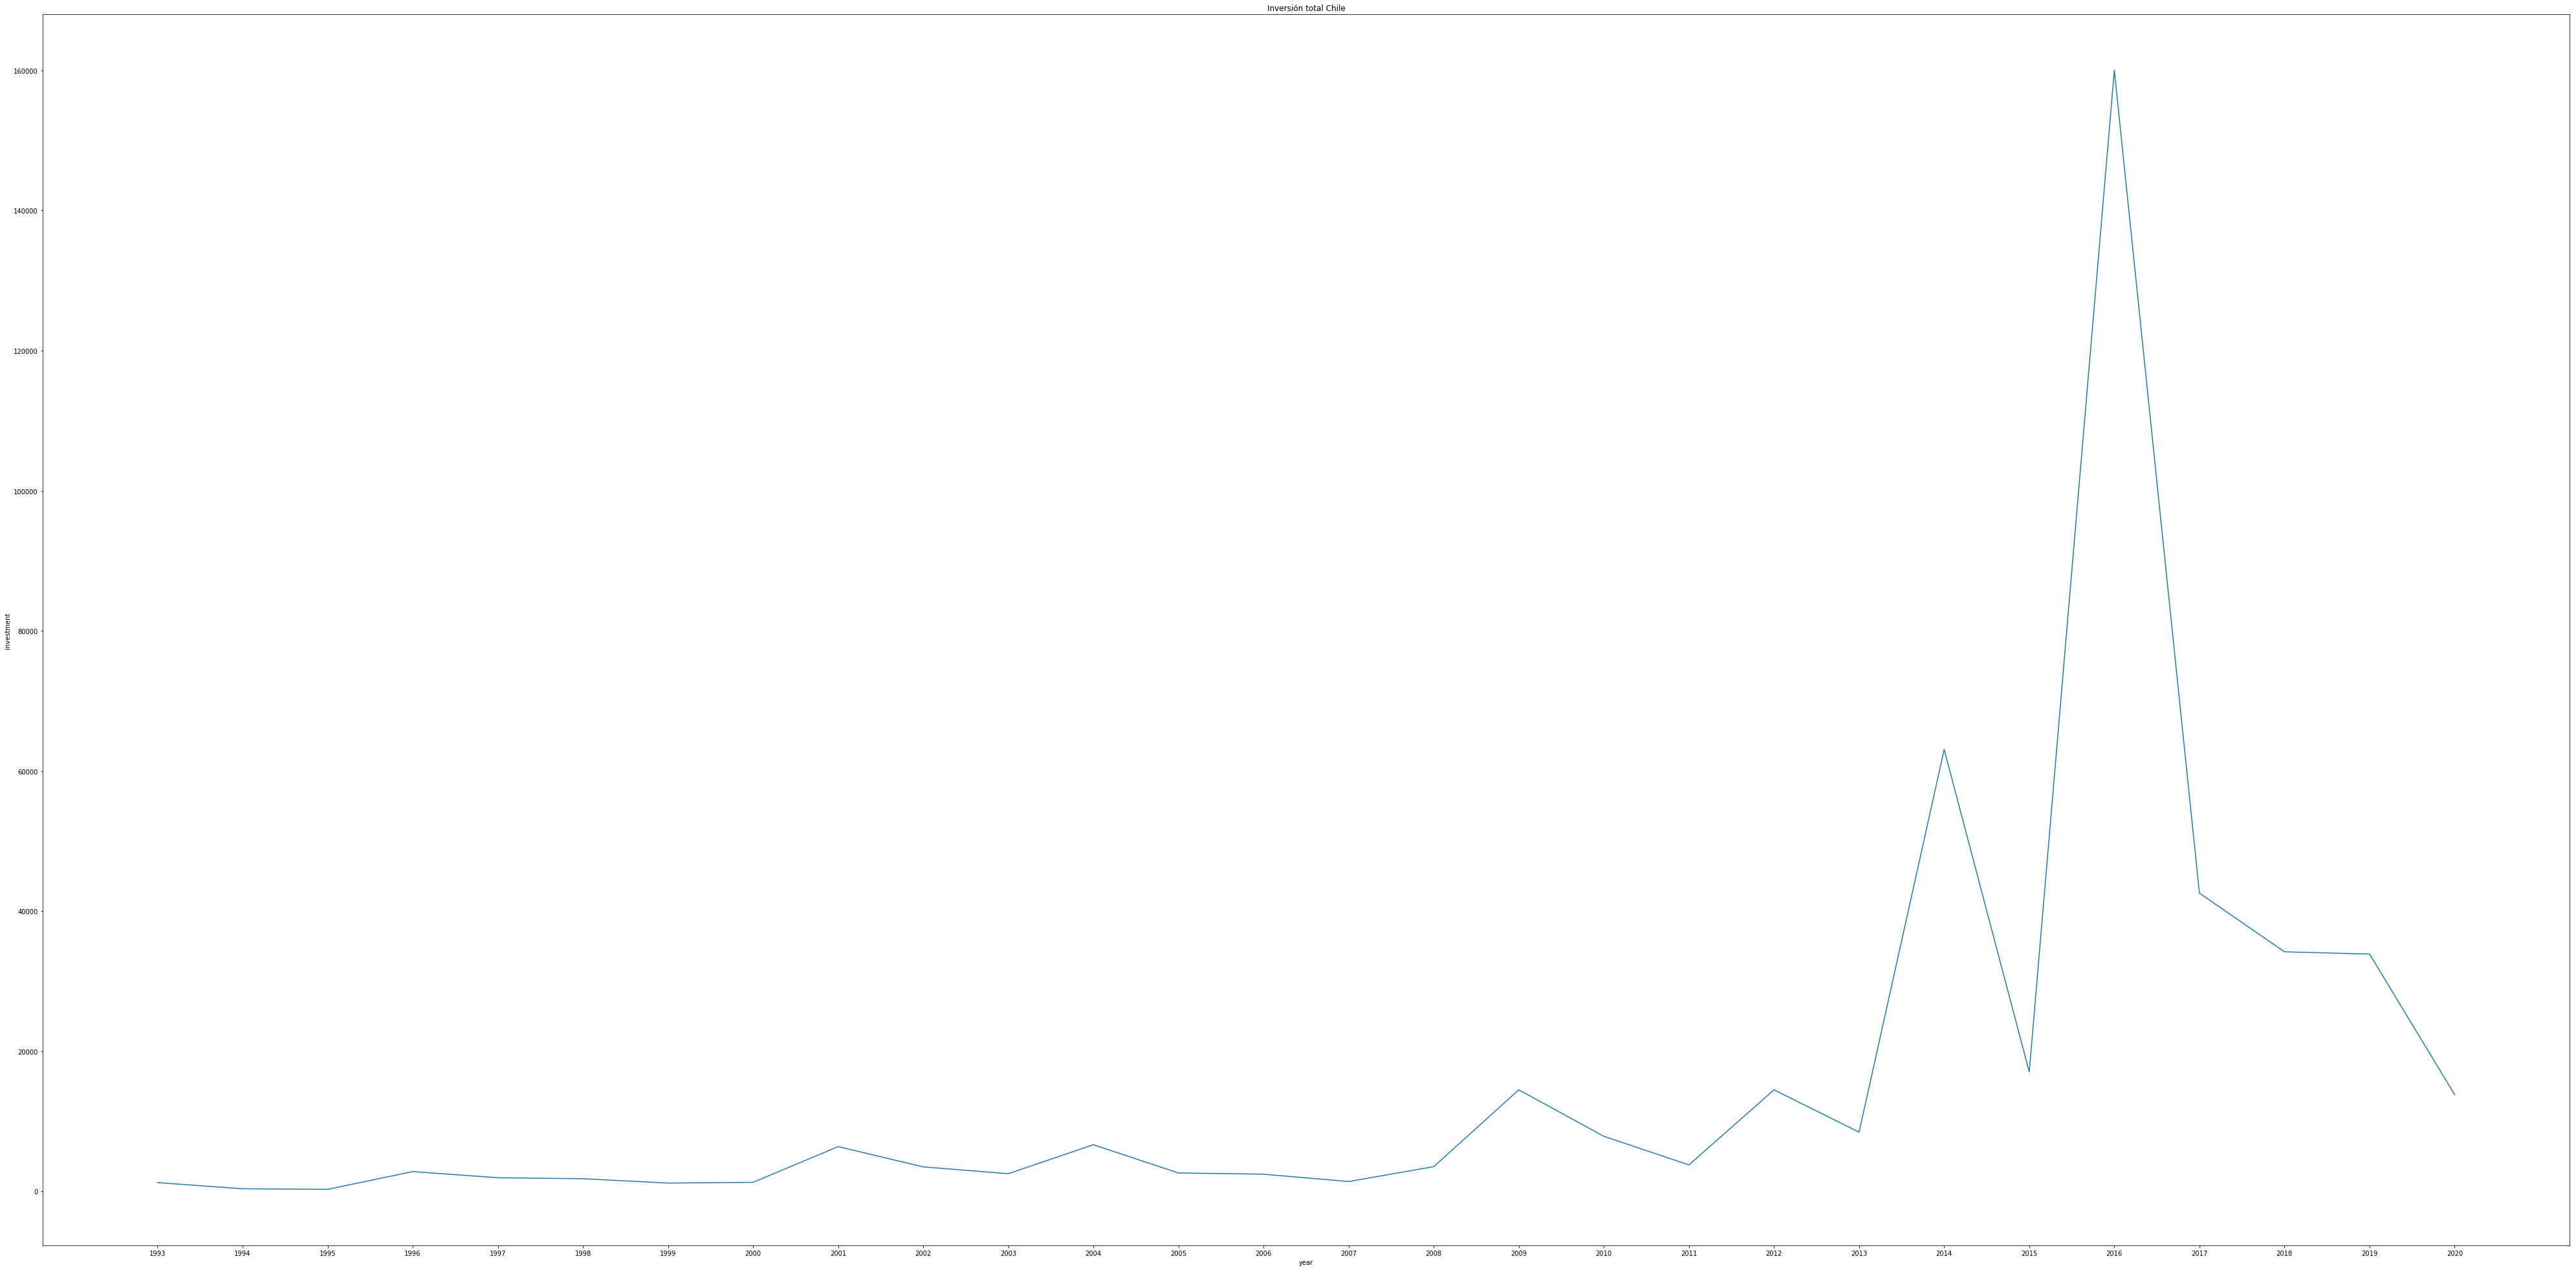

In [32]:
plt.figure(figsize=(70,35))
sns.lineplot(data=sp_investment_year_cl, x='year', y='investment')
plt.title('Inversión total Chile')

In [35]:
cl_max_invesment = sp_investment_year_cl['investment'].max()

In [37]:
sp_investment_year_cl[sp_investment_year_cl.investment==cl_max_invesment]

,year,country,investment
92,2016,CHILE,160021.75
